In [14]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [15]:
%autoreload 2

In [16]:
import main_analysis
import pandas as pd
from main_analysis import HBAC_analyser
import main_analysis
from sklearn import datasets
from sklearn import linear_model
import pickle
from sklearn.model_selection import train_test_split

# Method 1: HBAC with a model as input

In [17]:
# Load the diabetes dataset
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True,as_frame=True) # as_frame=True, since columns must be named!
X_train, X_test, y_train, y_test = train_test_split(diabetes_X, diabetes_y, test_size=0.3, random_state=66)

# Create linear regression object
model = linear_model.LinearRegression()

# Train the model using the training sets
model = model.fit(X_train, y_train)
pickle.dump(model, open('regression_diabetes_example.pkl', 'wb'))

# Display training data features
display(X_train)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
433,-0.027310,-0.044642,-0.060097,-0.029771,0.046589,0.019980,0.122273,-0.039493,-0.051401,-0.009362
23,0.045341,0.050680,0.060618,0.031053,0.028702,-0.047347,-0.054446,0.071210,0.133599,0.135612
24,-0.063635,-0.044642,0.035829,-0.022885,-0.030464,-0.018850,-0.006584,-0.002592,-0.025952,-0.054925
308,0.001751,-0.044642,-0.046085,-0.033214,-0.073119,-0.081480,0.044958,-0.069383,-0.061177,-0.079778
109,0.038076,0.050680,-0.009439,0.002363,0.001183,0.037517,-0.054446,0.050176,-0.025952,0.106617
...,...,...,...,...,...,...,...,...,...,...
122,0.048974,0.050680,0.081097,0.021872,0.043837,0.064134,-0.054446,0.071210,0.032433,0.048628
51,0.059871,0.050680,0.016428,0.028758,-0.041472,-0.029184,-0.028674,-0.002592,-0.002397,-0.021788
119,0.016281,-0.044642,-0.047163,-0.002228,-0.019456,-0.042963,0.033914,-0.039493,0.027368,0.027917
316,0.016281,0.050680,0.014272,0.001215,0.001183,-0.021355,-0.032356,0.034309,0.074968,0.040343


In [18]:
# Model path
model_path = 'regression_diabetes_example.pkl'

# Initialize HBAC 
hbac = HBAC_analyser()

# In this case, input includes model path, X data and Y data
### Note, HBAC can't handle mssing values, using miceforest for multiple imputation https://pypi.org/project/miceforest/
hbac.hbac_on_model(model_path, X_test, y_test) 

Averages results of 1 runs of HBAC
Average maximun negative biased cluster:  -0.8299354979357173 ± 0.0 , min= -0.8299354979357173
Average number of clusters:  4 ± 0.0
Average Sillhouette score:  0.13289228616122667 ± 0.0 , max= 0.13289228616122667


In [19]:
#c, max_neg_bias = main_analysis.get_max_bias_cluster(results, printing=True)

n_discrinated_cluster, bias =  hbac.get_max_bias_cluster(print_results=True)

1 has bias 0.05999734953112679
3 has bias -0.8299354979357173
0 has bias -0.31789305712868077
2 has bias -0.5252020975605979
cluster with the highest discriminating bias: 3


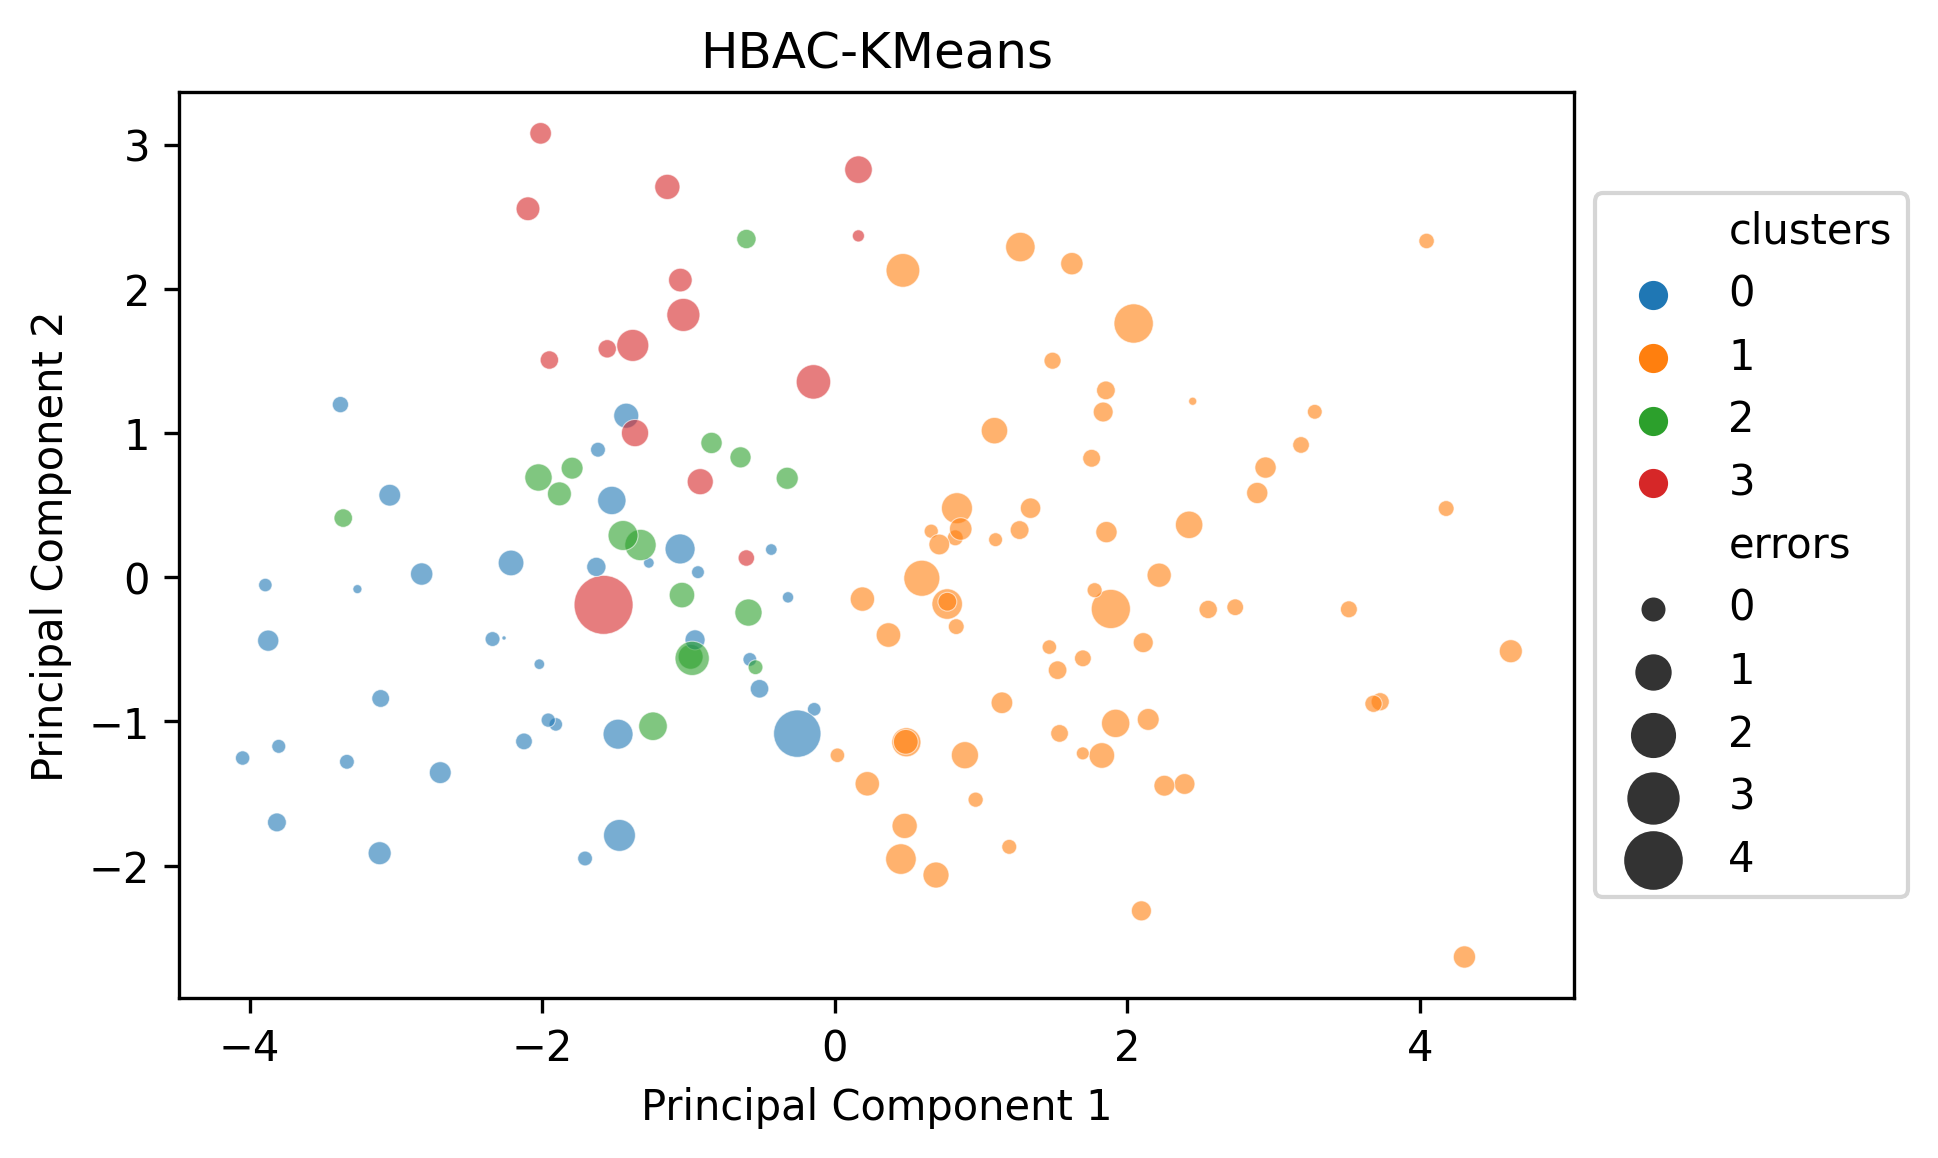

<bound method HBAC_analyser.get_max_bias_cluster of <main_analysis.HBAC_analyser object at 0x7fe753cfd6d0>>

In [20]:
# Plot cluster formed by HBAC
hbac.pca_plot()

# Get bias per cluster
hbac.get_max_bias_cluster

In [21]:
# Displaying results in dataframes
display(hbac.mean_clusters)

# Mean per feature 'discrimnated' cluster vs 'remaining' clusters
display(hbac.clustered_data)

,unscaled_discriminated_mean,unscaled_remaining_mean,difference,abs_relative_difference,welch_statistic,p_value
s6,-0.026483,0.001028,-0.027511,26.749817,-2.890014,7.976965e-03
bmi,-0.030349,0.002060,-0.032409,15.730235,-4.201980,2.057235e-04
sex,-0.044642,0.003827,-0.048469,12.664756,-11.001567,9.241969e-20
s4,-0.036197,0.003803,-0.040000,10.518257,-5.522756,2.537786e-06
s5,-0.027839,0.005419,-0.033258,6.137334,-4.051750,3.234271e-04
errors,0.660242,0.145035,0.515206,3.552280,1.596732,1.316613e-01
true_value,86.466667,159.288136,-72.821469,0.457168,-5.206215,1.991906e-05
predicted_value,113.145023,156.841218,-43.696195,0.278601,-4.753420,4.632232e-05
bp,-0.003222,-0.000827,-0.002395,-2.895251,-0.164852,8.709986e-01
age,0.010953,-0.003360,0.014313,-4.260138,1.439721,1.630195e-01


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,predicted_value,true_value,errors,scaled_errors,clusters,new_clusters
377,0.428052,1.103026,0.242548,0.400578,0.306636,0.998450,-1.296573,1.453487,0.155161,-1.222117,167.929727,235.0,-0.285405,-0.595193,1,-1.0
96,1.145972,1.103026,0.242548,1.036229,-0.096867,-0.248698,-0.909232,0.707707,1.180827,0.682343,211.302870,150.0,0.408686,0.250413,1,-1.0
235,1.361347,1.103026,-0.277757,1.224570,-1.249731,-0.735223,-1.296573,0.275154,-0.136087,1.013554,178.480845,124.0,0.439362,0.287785,1,-1.0
246,0.858804,-0.906597,-0.639709,-1.247404,1.661252,1.135499,1.182409,-0.187230,0.866812,-1.139314,122.419703,78.0,0.569483,0.446312,3,-1.0
19,-0.505242,-0.906597,-0.345623,-0.800095,-0.068045,-0.228141,0.795068,-0.783855,-0.211961,-1.056511,122.825927,168.0,-0.268893,-0.575076,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230,-0.720618,1.103026,1.532001,-1.153234,3.217620,3.431074,0.020386,1.468403,0.970880,1.427567,166.996983,220.0,-0.240923,-0.541000,1,-1.0
136,-1.797497,-0.906597,-1.680319,-1.153234,-1.278553,-1.468436,1.027473,-1.529635,-1.361318,-0.394091,57.040432,85.0,-0.328936,-0.648226,0,0.0
334,-1.151369,1.103026,-0.956416,-0.446956,-1.509126,-1.242305,-0.134550,-0.783855,-1.289909,-1.056511,81.359322,72.0,0.129991,-0.089119,0,0.0
243,0.356261,1.103026,-0.933794,0.259323,-0.702121,-0.330927,-0.212018,-0.038074,-0.911860,-0.808104,103.911971,47.0,1.210893,1.227736,2,-1.0


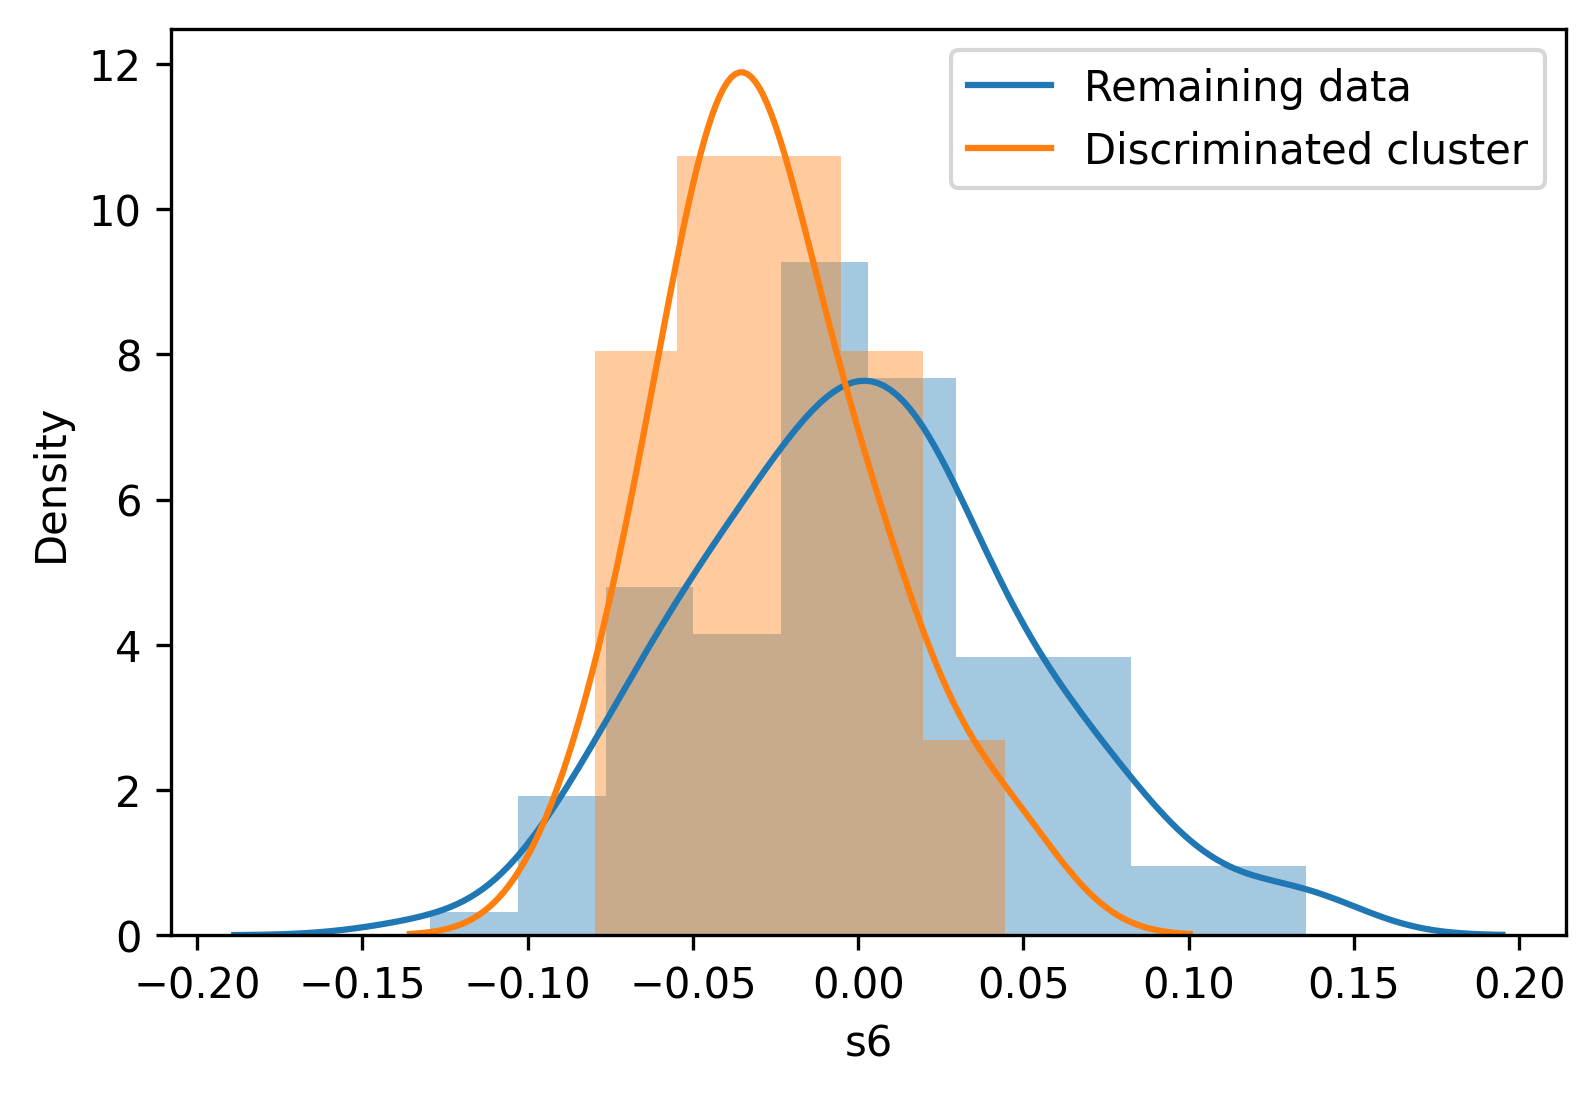

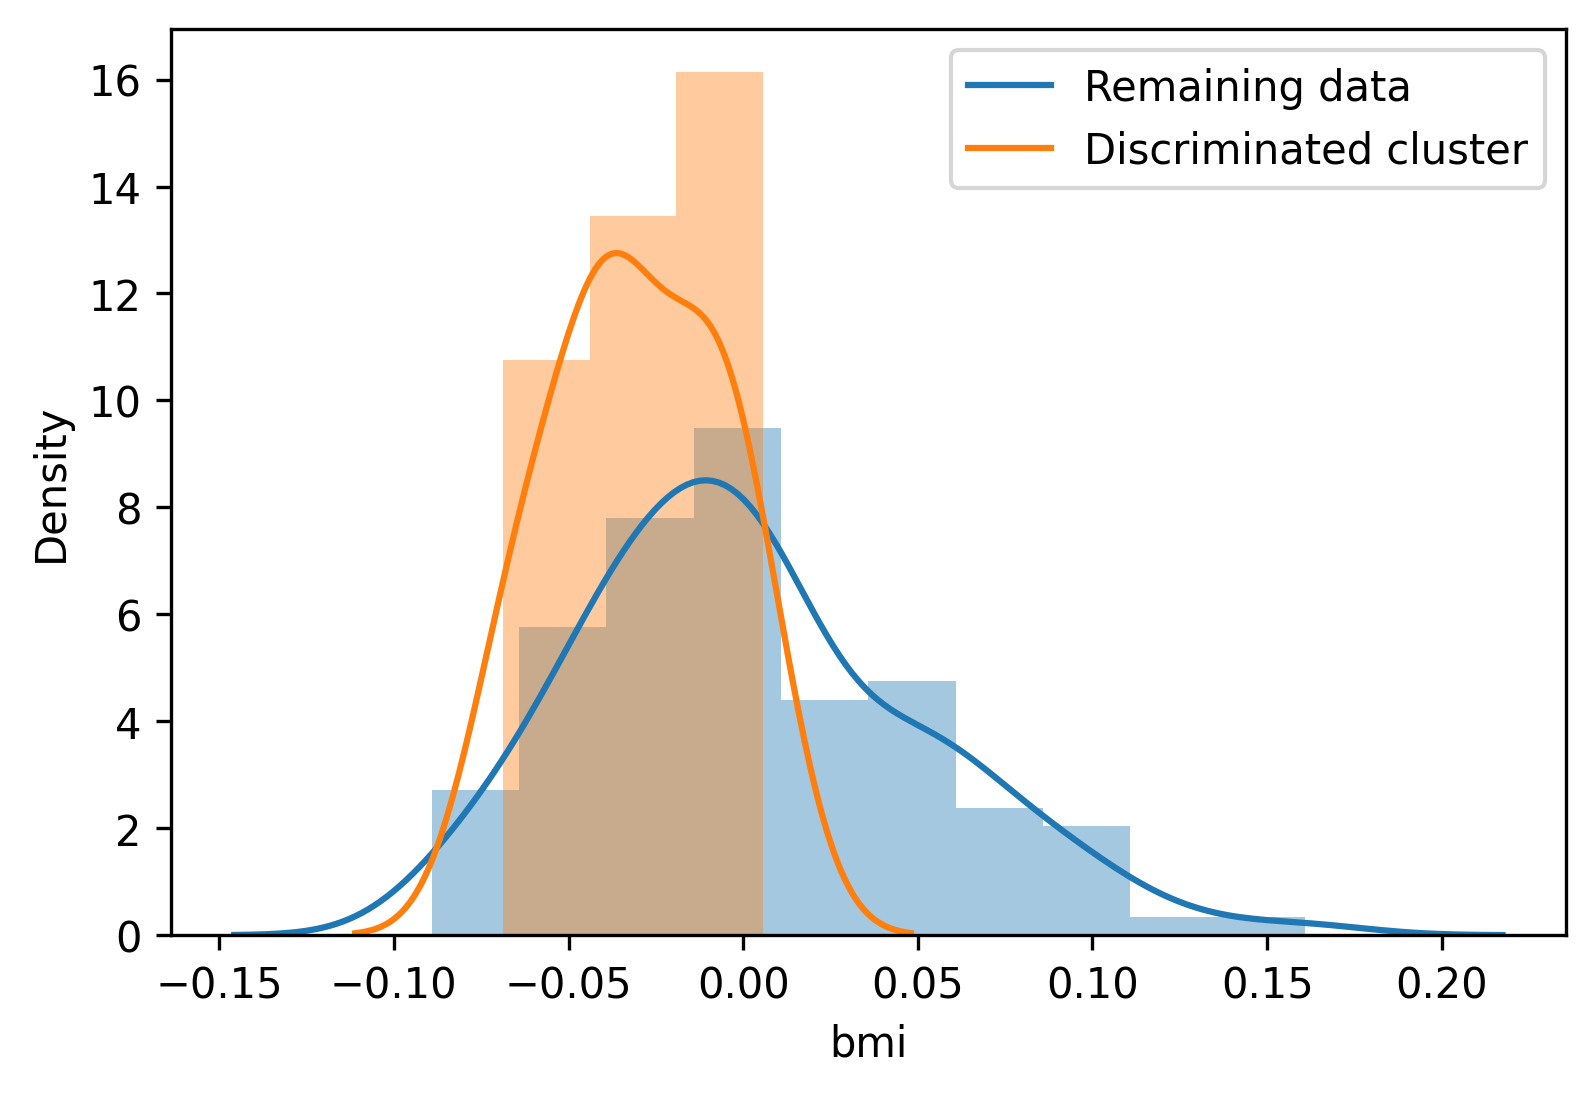

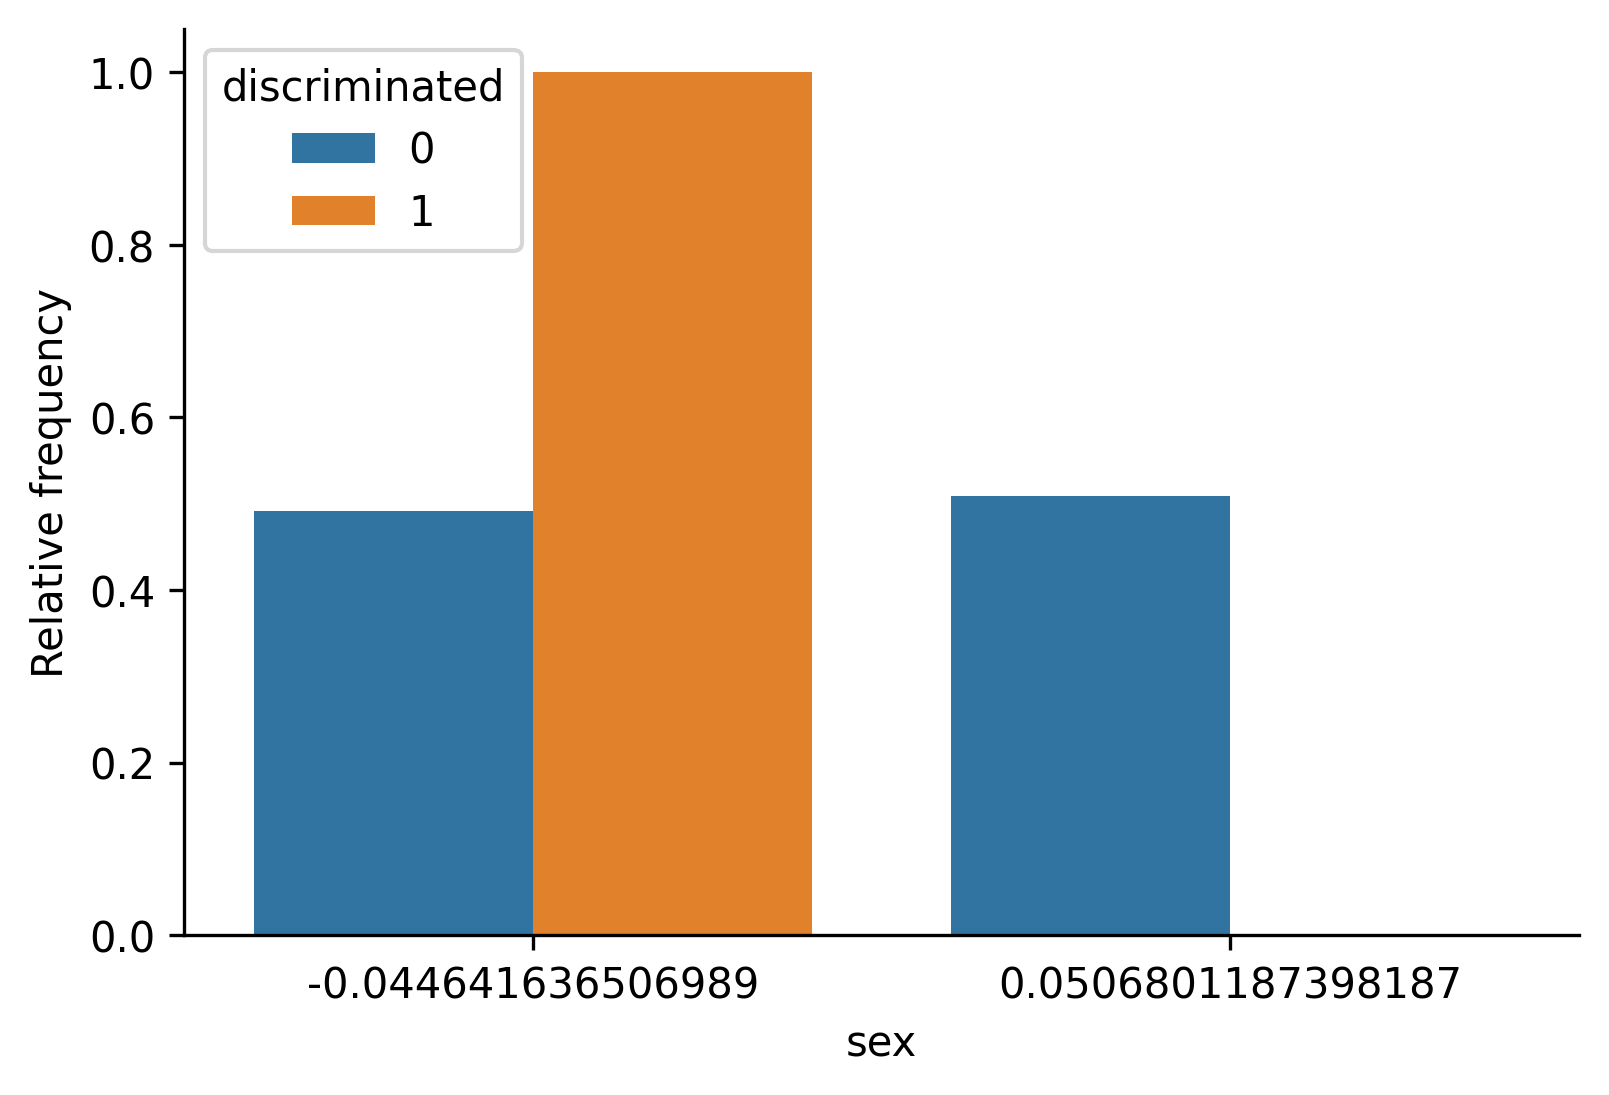

In [22]:
# Plot 3 most different features' distributions
hbac.plot_distributions(plot_top_features = 3)

[14:44:21] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 0 pruned nodes, max_depth=3
[0]	eval-auc:0.842857	train-auc:0.877711
Multiple eval metrics have been passed: 'train-auc' will be used for early stopping.

Will train until train-auc hasn't improved in 5 rounds.
[14:44:21] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 0 pruned nodes, max_depth=3
[1]	eval-auc:0.814286	train-auc:0.996386
[14:44:21] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=3
[2]	eval-auc:0.848571	train-auc:1
[14:44:21] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=3
[3]	eval-auc:0.9	train-auc:1
[14:44:21] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[4]	eval-auc:0.92	train-auc:1
[14:44:21] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[5]	eval-auc:0.91

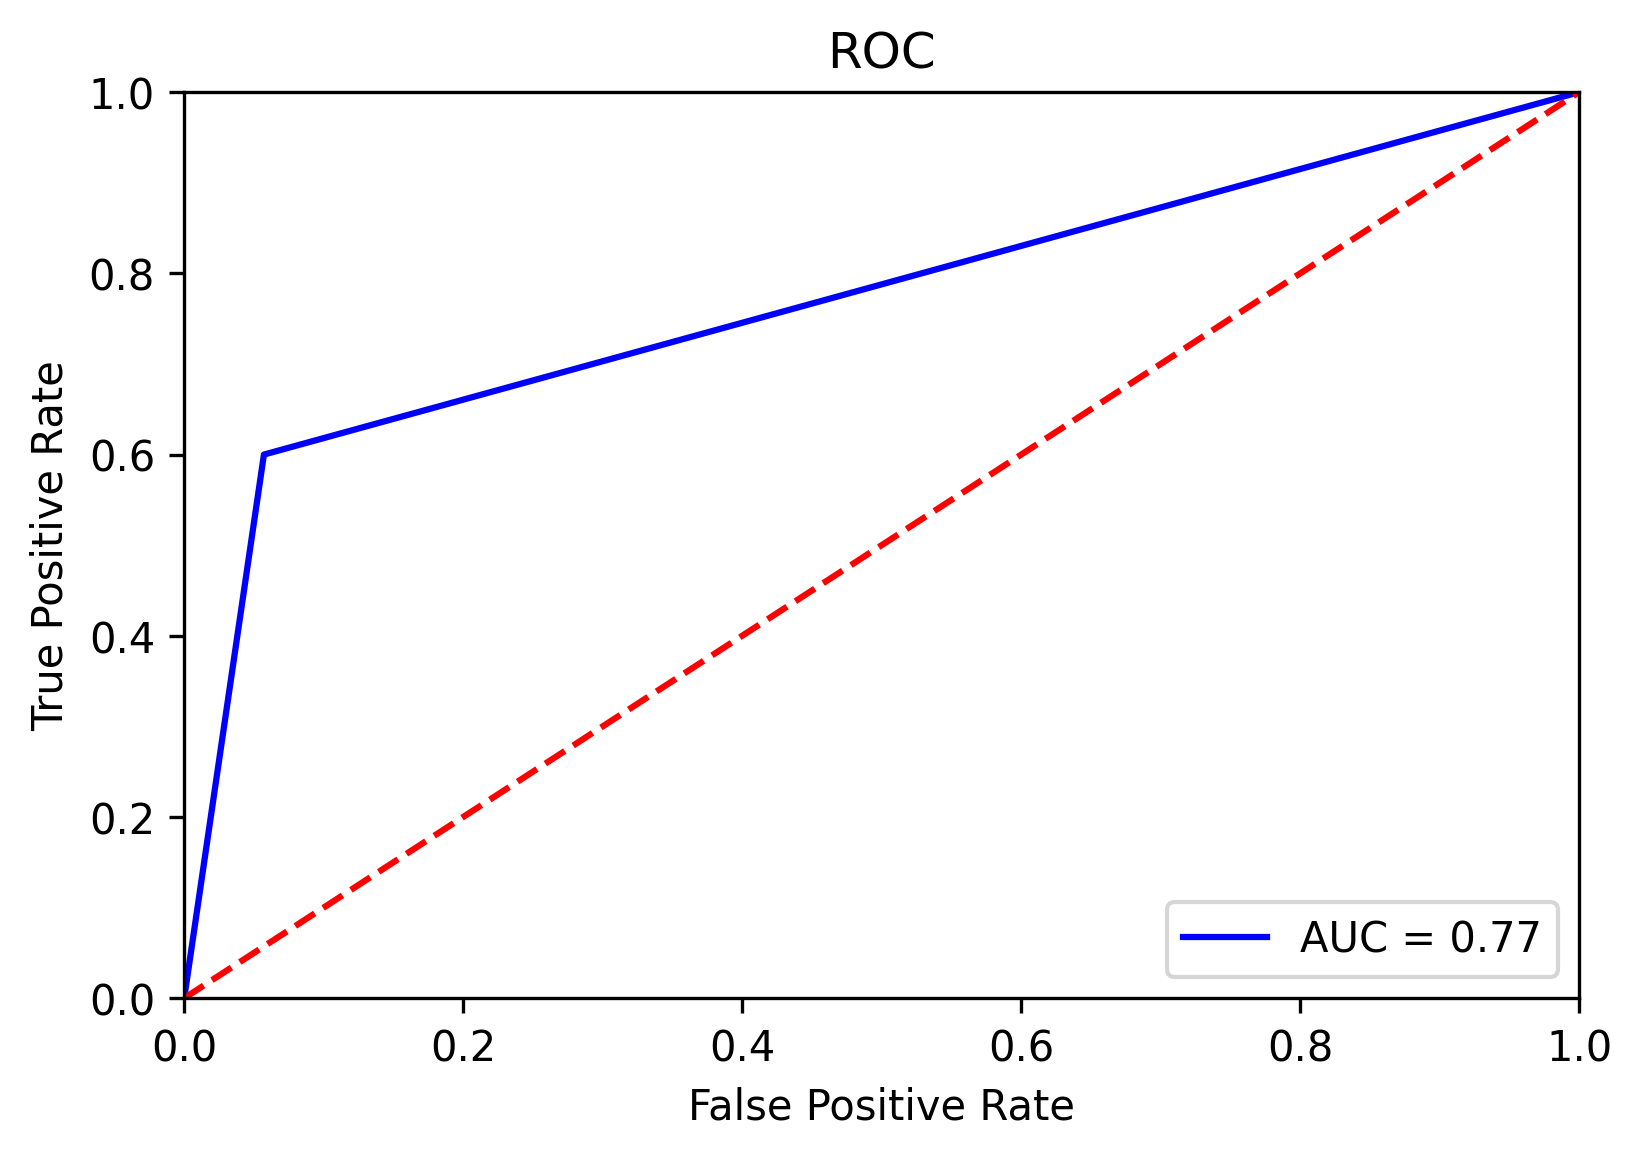

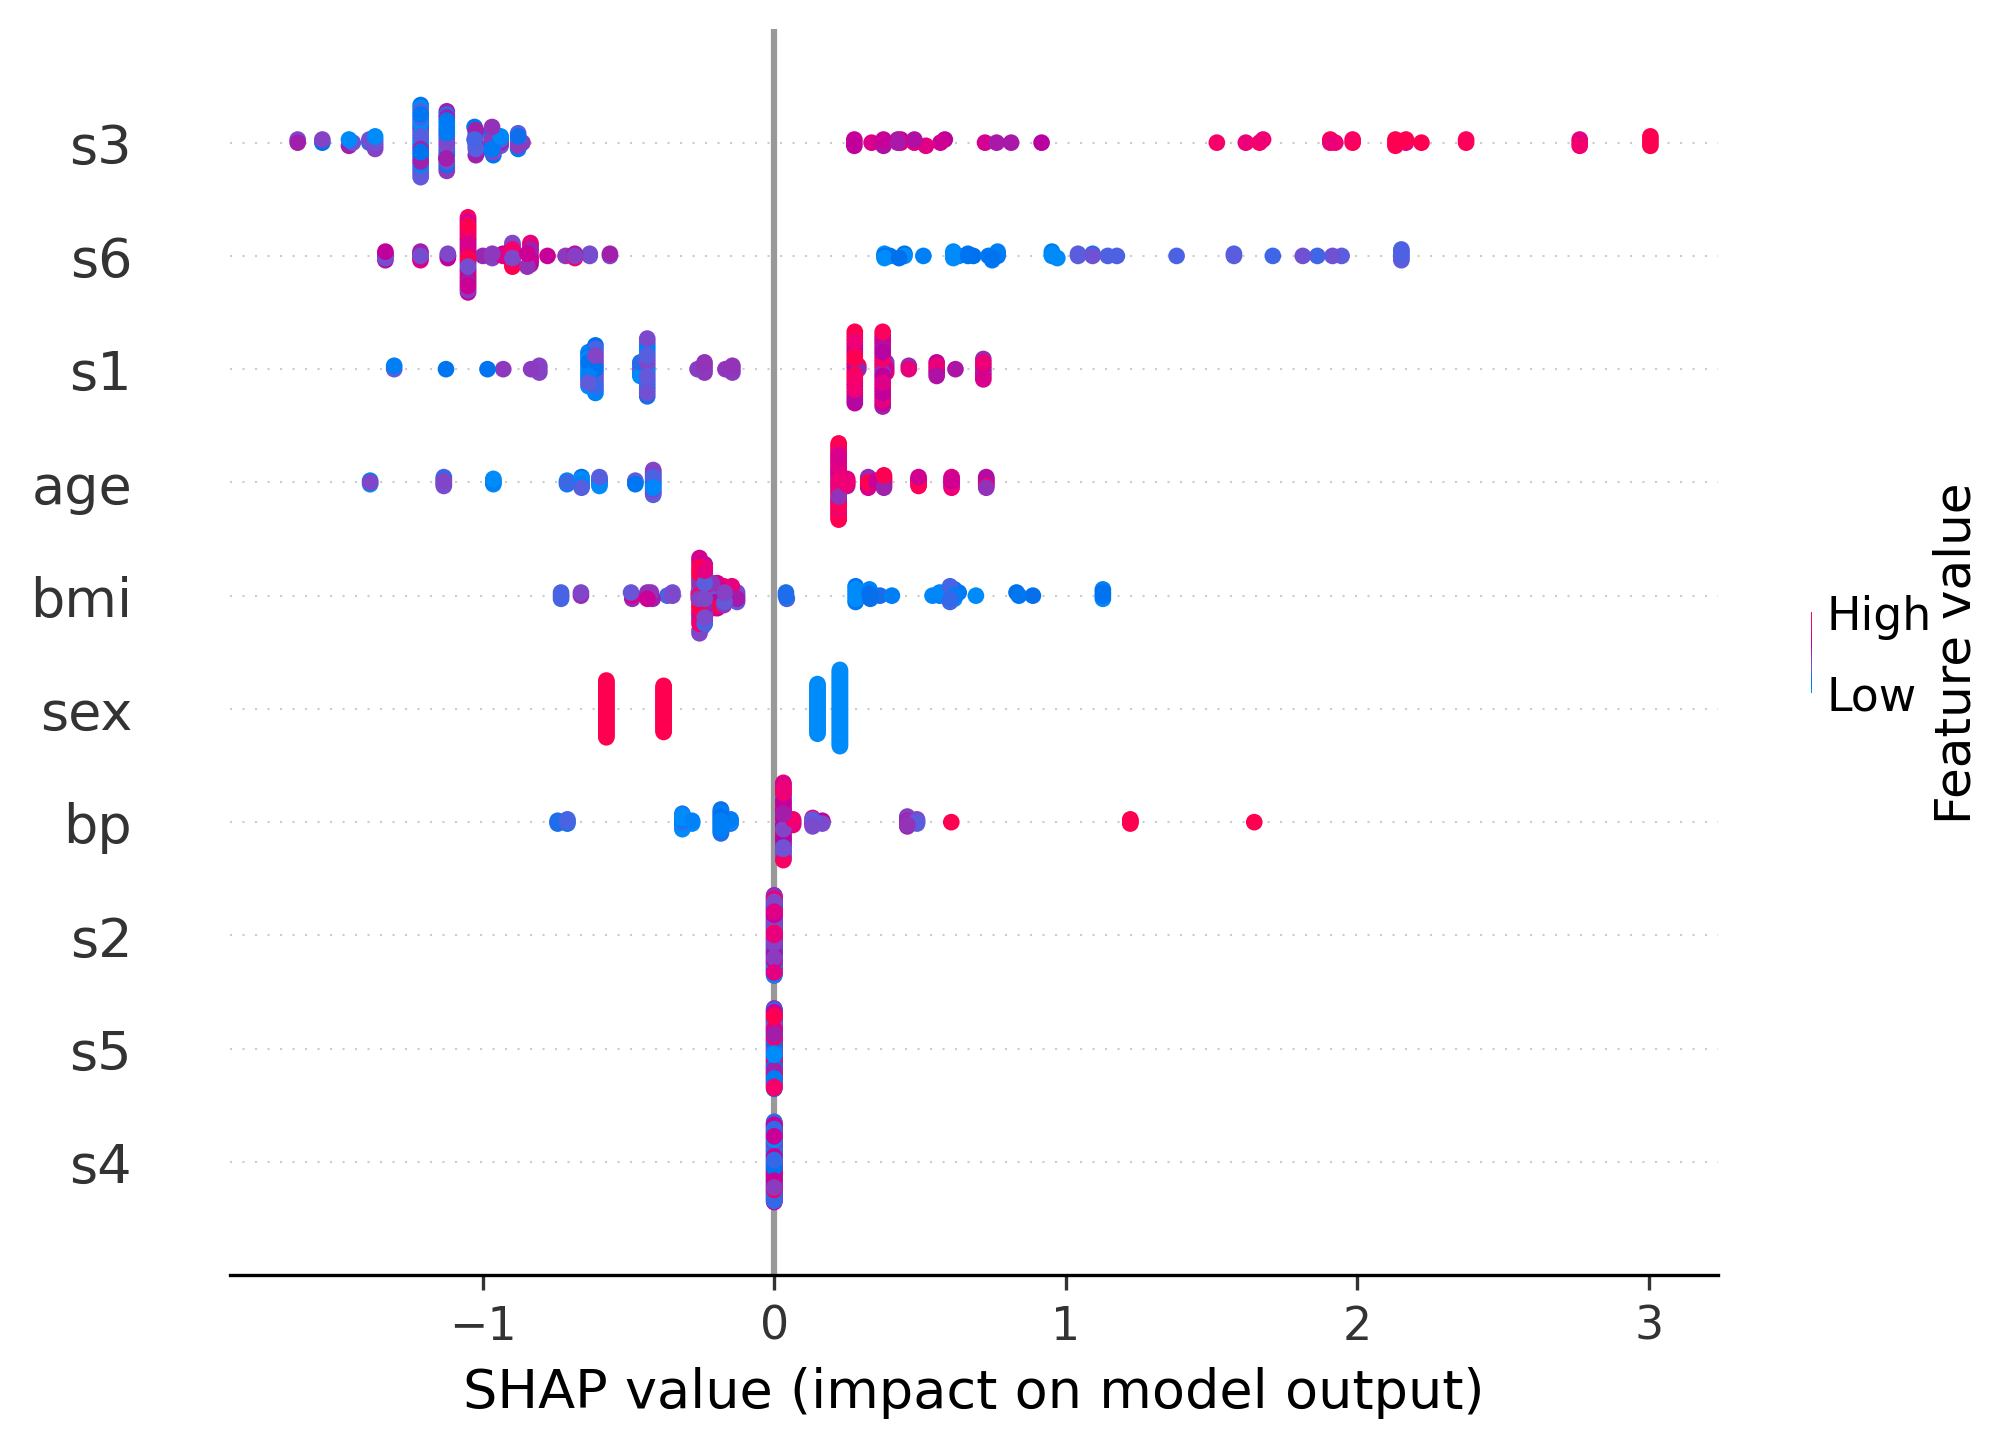

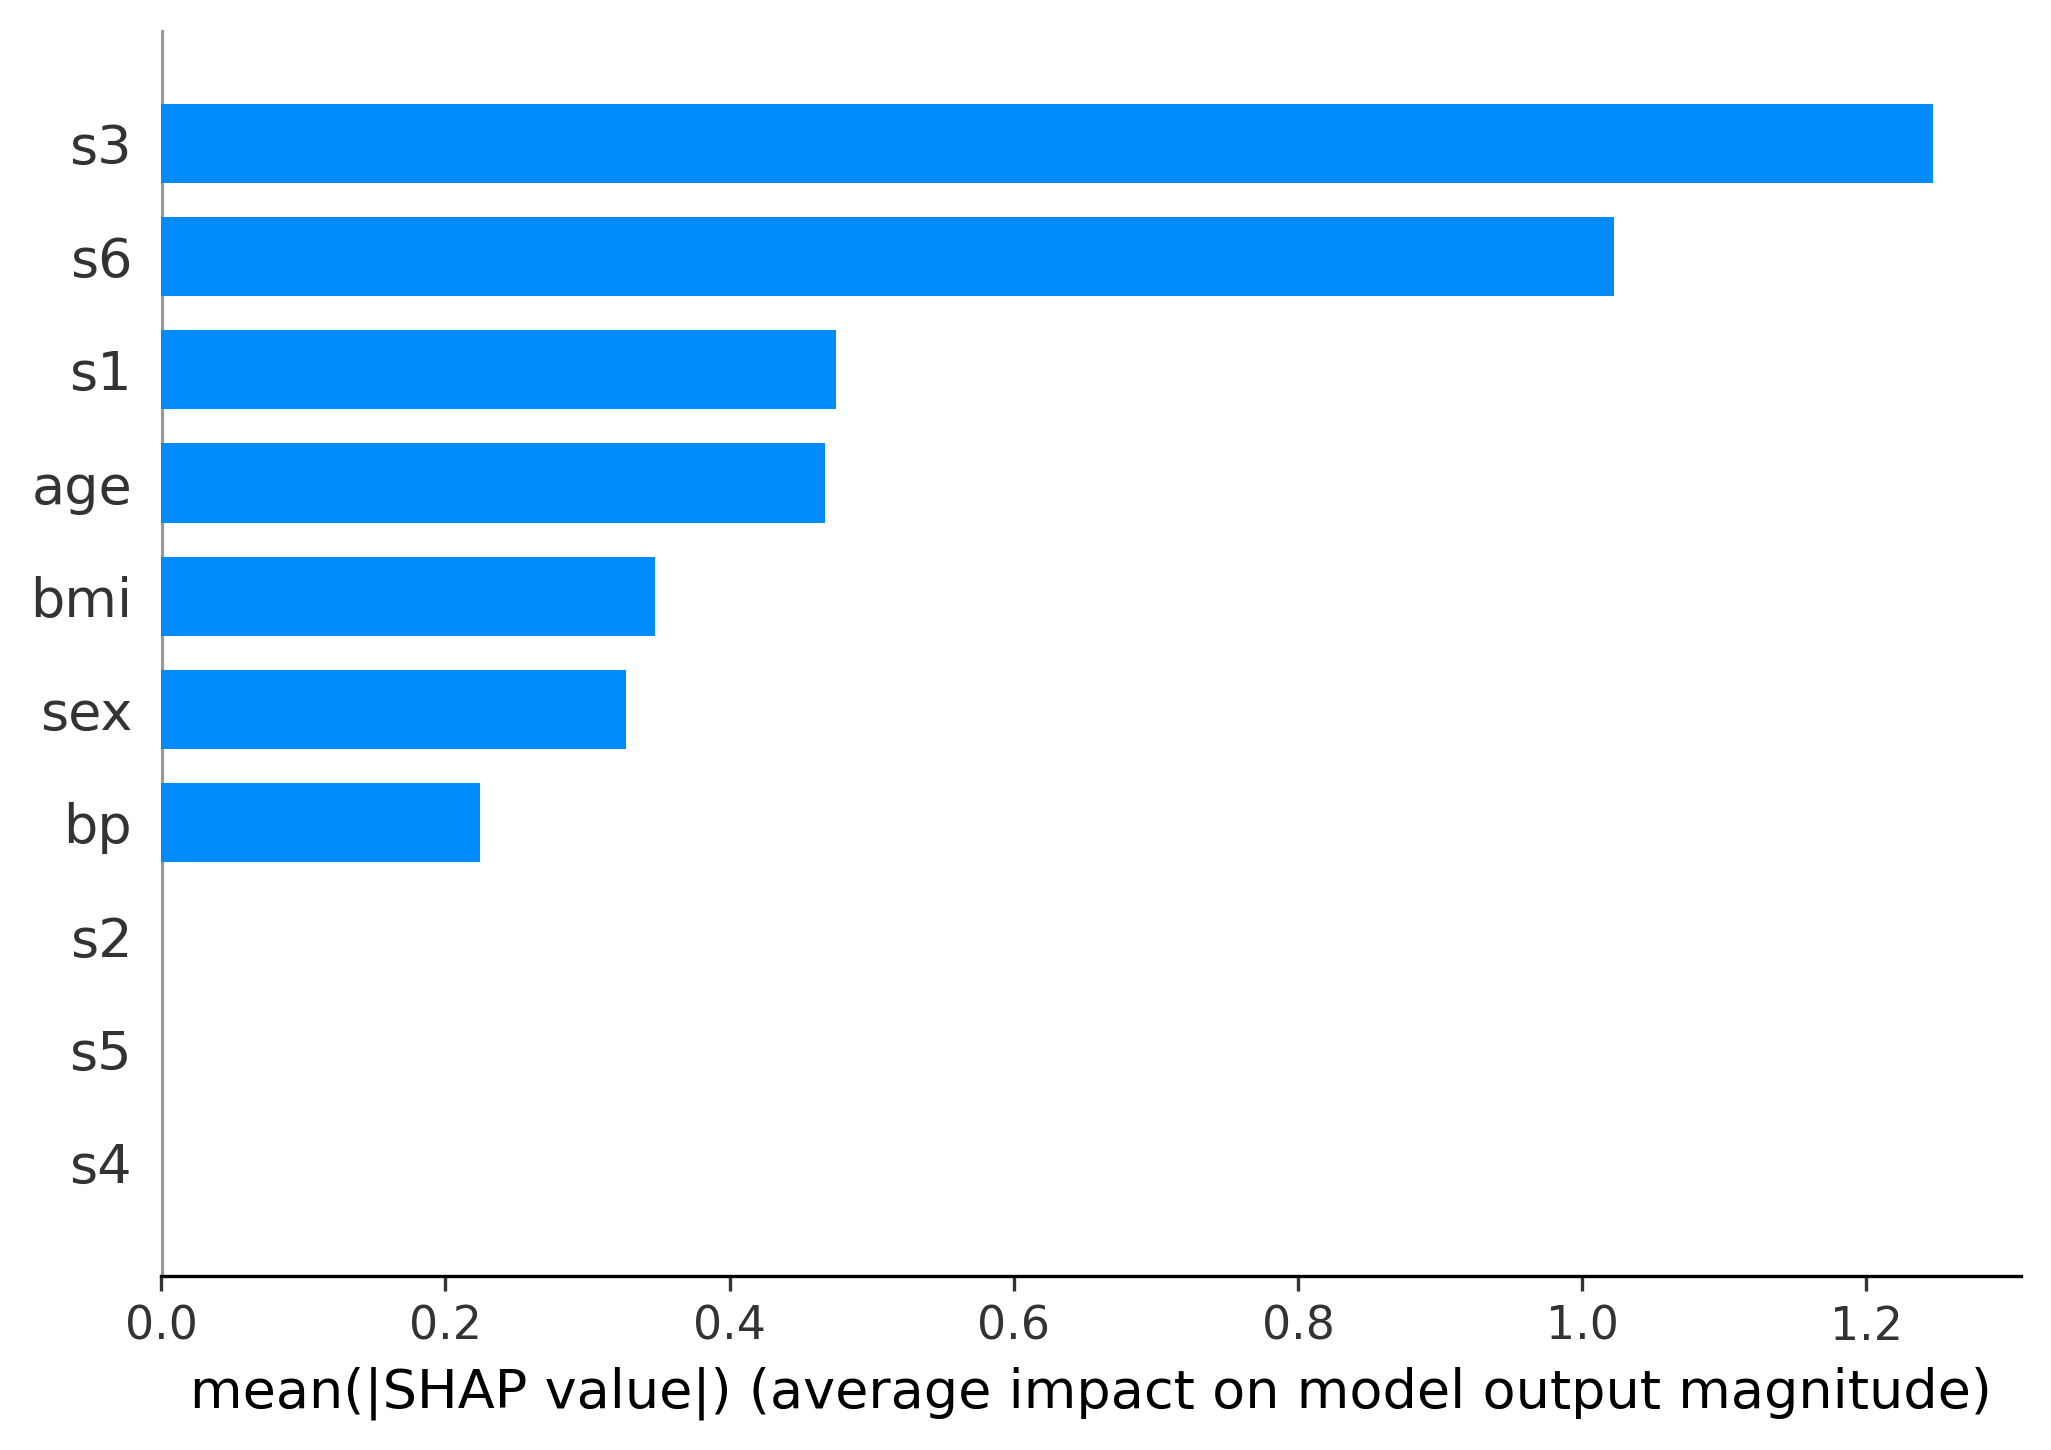

In [25]:
# Train XGBoost a binary classifier to predict whther a datapoint will be discrimnated or not, without using error as feature.
hbac.segment_predictor(plot_roc_auc=True,shap_analysis=True)

In [24]:
hbac.segment_predictor(runs=10)

[14:42:40] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 0 pruned nodes, max_depth=4
[0]	eval-auc:0.665714	train-auc:0.983735
Multiple eval metrics have been passed: 'train-auc' will be used for early stopping.

Will train until train-auc hasn't improved in 5 rounds.
[14:42:40] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 0 pruned nodes, max_depth=3
[1]	eval-auc:0.751429	train-auc:0.999398
[14:42:40] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=3
[2]	eval-auc:0.774286	train-auc:1
[14:42:40] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=3
[3]	eval-auc:0.76	train-auc:1
[14:42:40] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[4]	eval-auc:0.797143	train-auc:1
[14:42:40] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[5]	eval-auc